## 1. Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

## 2. Read the dataset

In [2]:
purchase_history = pd.read_csv('dataset.csv')

## 3. EDA

In [3]:
print("Shape: {}".format(purchase_history.shape))
print("Data types: ")
purchase_history.dtypes

Shape: (198101, 3)
Data types: 


user_id            object
timestamp          object
purchase_value    float64
dtype: object

In [4]:
purchase_history.head(3)

,user_id,timestamp,purchase_value
0,f348dcc1ecdd88dd269eabf86dd2dd65e92ca69e841951...,2022-11-07 02:57:17.727,1274.0
1,815bcad338795606138d9fb381d25f8ebd091259768bfa...,2022-11-07 02:46:43.512,450.0
2,a1924cc344555547f1946439d01b6019f2af5498f94783...,2022-11-07 03:10:36.281,315.0


In [6]:
unique_dates = purchase_history['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date()).unique()
print("Data contains dates from: [{}, {}] i.e. during the span of: {} days".format(min(unique_dates), max(unique_dates), (max(unique_dates)-min(unique_dates)).days+1 ))
print("Total distinct dates in the data: {}".format(len(unique_dates)))

# Note 1: We see that data collected is during a span of approx 4 months 

Data contains dates from: [2022-08-15, 2022-12-14] i.e. during the span of: 122 days
Total distinct dates in the data: 122


In [7]:
print("Distinct user count: {}".format(purchase_history['user_id'].nunique()))

# Note 2: Also, distinct number of users in the data are around 23k

Distinct user count: 23583


### 3.1. Distirbution of repeat purchases

In [8]:
repeat_order_user_lvl = purchase_history['user_id'].value_counts().reset_index()
repeat_order_user_lvl.columns = ['userid', 'num_orders']

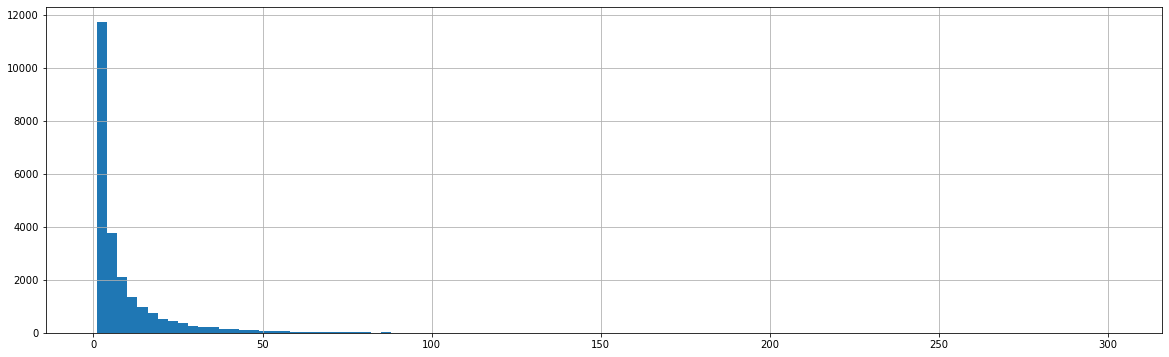

In [9]:
# Distribution of repeat orders
repeat_order_user_lvl['num_orders'].hist(bins=100, figsize=(20,6));

In [10]:
print("Percentage of users making more than  1 order/s: {}%".format(round(repeat_order_user_lvl[repeat_order_user_lvl['num_orders']>1].shape[0]/purchase_history['user_id'].nunique()*100, 2)))
print("Percentage of users making more than 10 order/s: {}%".format(round(repeat_order_user_lvl[repeat_order_user_lvl['num_orders']>10].shape[0]/purchase_history['user_id'].nunique()*100, 2)))
print("Percentage of users making more than 20 order/s: {}%".format(round(repeat_order_user_lvl[repeat_order_user_lvl['num_orders']>20].shape[0]/purchase_history['user_id'].nunique()*100, 2)))
print("Percentage of users making more than 40 order/s: {}%".format(round(repeat_order_user_lvl[repeat_order_user_lvl['num_orders']>40].shape[0]/purchase_history['user_id'].nunique()*100, 2)))

Percentage of users making more than  1 order/s: 72.1%
Percentage of users making more than 10 order/s: 23.28%
Percentage of users making more than 20 order/s: 10.9%
Percentage of users making more than 40 order/s: 3.14%


In [11]:
# Note 3: From above we see that very less percentage of users make a huge number of repeat purchases

### 3.2. Distribution of purchses wrt users

In [12]:
repeat_order_user_lvl['per'] = repeat_order_user_lvl['num_orders']/sum(repeat_order_user_lvl['num_orders'].values)*100
repeat_order_user_lvl['cum_per'] = repeat_order_user_lvl['per'].cumsum()
repeat_order_user_lvl.head(3)

,userid,num_orders,per,cum_per
0,6961711b409c470a3d507f564b9cecae8ed0018aed8814...,301,0.151943,0.151943
1,cadd8bdca4ac474f448e77cec18302fdd2407d9bdd110b...,220,0.111054,0.262997
2,691bd5fb12c5096b35c9a57bfd9b2abc292e001c2147b7...,208,0.104997,0.367994


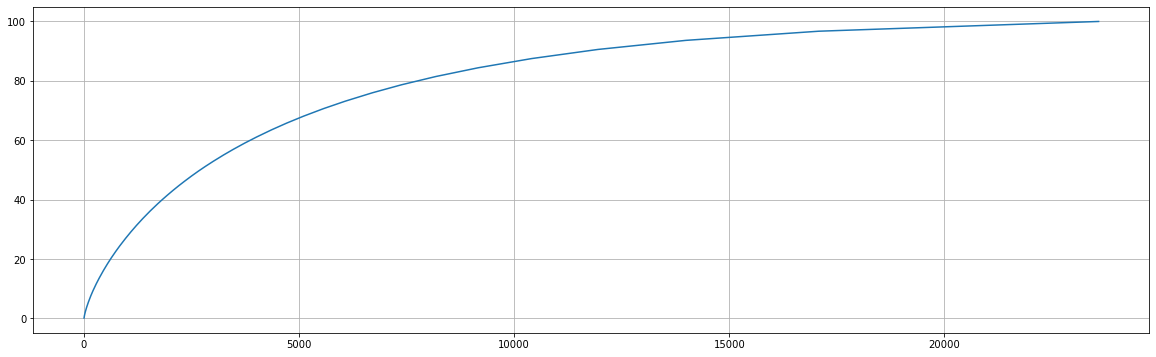

In [13]:
repeat_order_user_lvl['cum_per'].plot(figsize=(20,6), grid=True);

In [14]:
for i in [25, 50, 75, 80, 90, 95]:
    print("{}% of orders are made by {}% users".format(i, round(repeat_order_user_lvl[repeat_order_user_lvl['cum_per']<=i].shape[0]/purchase_history['user_id'].nunique()*100), 2))


25% of orders are made by 4% users
50% of orders are made by 11% users
75% of orders are made by 27% users
80% of orders are made by 33% users
90% of orders are made by 49% users
95% of orders are made by 65% users


In [15]:
# Note 4.1: from the above plot we see that out of total purchases, a lot of purchases have been made too few users
# Note 4.2: we see that almost half of the orders are made by just 11% users

In [16]:
# Note 5: The numbers we see in section 3.1 and 3.2 looks satisfactory, this type of distribution os expected for such a business

### 3.3. Analysis on timestamp column

In [22]:
hour_wise_order_counts = purchase_history['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')).apply(lambda x: x.hour).value_counts(normalize=False).to_frame()
hour_wise_order_counts = hour_wise_order_counts.reset_index().rename(columns={'index':'hour', 'timestamp':'count'})

# Add misiing hours if any
missing_hours = list(set([i for i in range(0, 24)]) - set(hour_wise_order_counts.hour))
missing_hours_df = pd.DataFrame(list(zip(missing_hours, [0]*len(missing_hours))),columns =['hour', 'count'])
hour_wise_order_counts = hour_wise_order_counts.append(missing_hours_df).reset_index(drop=True)

# Calculate percentage of overall orders made in an hour
hour_wise_order_counts['per'] = round(hour_wise_order_counts['count']/sum(hour_wise_order_counts['count'])*100, 3)
hour_wise_order_counts['cum_per'] = hour_wise_order_counts['per'].cumsum()

hour_wise_order_counts

,hour,count,per,cum_per
0,3,15532,7.840,7.840
1,4,15380,7.764,15.604
2,13,14882,7.512,23.116
3,14,14711,7.426,30.542
4,5,13477,6.803,37.345
5,15,12906,6.515,43.860
6,12,12866,6.495,50.355
7,6,12691,6.406,56.761
8,2,11454,5.782,62.543
9,7,11037,5.571,68.114


In [23]:
# From the data we see that the top two peak hours are between 3 am to 5 am and there are no orders made between 9pm to 12 midnight
# Zepto - grocery shopping app lets you order groceries any time in the day from 7 am to 1 am. (Source: Google Play)
# Therefore it seems that the timestamp is in some other timezone, probably UTC (assuming since this is most probable and no prior info is provided)
# Therefore we convert this into IST 
purchase_history['ist_timestamp'] = purchase_history['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f') + timedelta(hours=5, minutes=30))

In [26]:
# Therefore recalculating this again
unique_dates = purchase_history['ist_timestamp'].apply(lambda x: x.date()).unique()
print("Data contains dates (IST) from: [{}, {}] i.e. during the span of: {} days".format(min(unique_dates), max(unique_dates), (max(unique_dates)-min(unique_dates)).days+1 ))
print("Total distinct dates in the data: {}".format(len(unique_dates)))

# We see that data collected is during a span of approx 4 months 

Data contains dates (IST) from: [2022-08-16, 2022-12-14] i.e. during the span of: 121 days
Total distinct dates in the data: 121


In [28]:
hour_wise_order_counts = purchase_history['ist_timestamp'].apply(lambda x: x.hour).value_counts(normalize=False).to_frame()
hour_wise_order_counts = hour_wise_order_counts.reset_index().rename(columns={'index':'hour', 'ist_timestamp':'count'})

# Add misiing hours if any
missing_hours = list(set([i for i in range(0, 24)]) - set(hour_wise_order_counts.hour))
missing_hours_df = pd.DataFrame(list(zip(missing_hours, [0]*len(missing_hours))),columns =['hour', 'count'])
hour_wise_order_counts = hour_wise_order_counts.append(missing_hours_df).reset_index(drop=True)

# Calculate percentage of overall orders made in an hour
hour_wise_order_counts['per'] = round(hour_wise_order_counts['count']/sum(hour_wise_order_counts['count'])*100, 3)
hour_wise_order_counts['cum_per'] = hour_wise_order_counts['per'].cumsum()

hour_wise_order_counts

,hour,count,per,cum_per
0,9,15759,7.955,7.955
1,19,14956,7.550,15.505
2,10,14458,7.298,22.803
3,18,14172,7.154,29.957
4,8,14171,7.153,37.110
5,20,14128,7.132,44.242
6,11,12942,6.533,50.775
7,12,11880,5.997,56.772
8,17,11673,5.892,62.664
9,21,11485,5.798,68.462


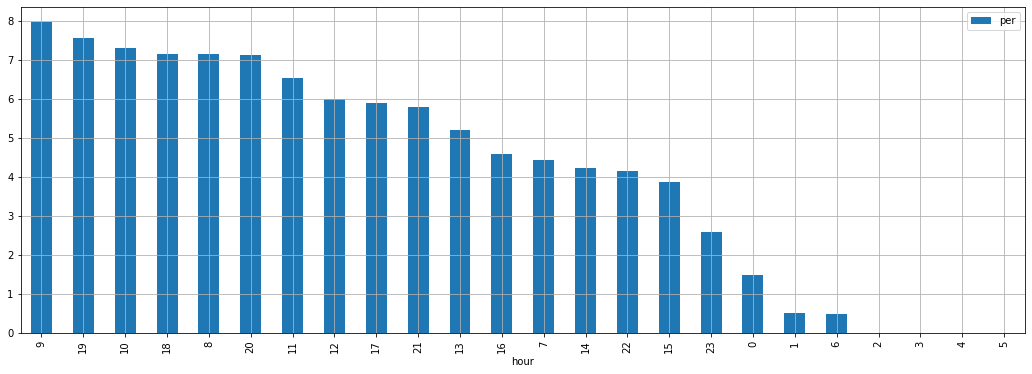

In [30]:
hour_wise_order_counts.plot.bar(x='hour', y=['per'], figsize=(18,6), grid=True);

# From above we see that there are 6 peak hours
# 3 in morning (8am - 11am) in 3(6pm - 9pm) in evening
# Togethor these contribute to around 45% of the total traffic during the operational hours
# Note: We can ignore the small number of orders made during hour 1 and hour 6 can be ignored.

## 3.4. Average orders in a day

In [32]:
day_wise_order_counts = purchase_history['ist_timestamp'].apply(lambda x: x.date()).value_counts(normalize=False).to_frame()
day_wise_order_counts = day_wise_order_counts.reset_index().rename(columns={'index':'process_date', 'ist_timestamp':'count'})

# Add missing process_date if any
missing_dates = list(set([(min(day_wise_order_counts.process_date) + timedelta(i)) for i in range(0, 121)]) - set(day_wise_order_counts.process_date))
missing_dates_df = pd.DataFrame(list(zip(missing_dates, [0.0]*len(missing_dates))),columns =['process_date', 'count'])
day_wise_order_counts = day_wise_order_counts.append(missing_dates_df).reset_index(drop=True)

day_wise_order_counts.head(3)

,process_date,count
0,2022-12-11,2387
1,2022-11-27,2312
2,2022-12-04,2306


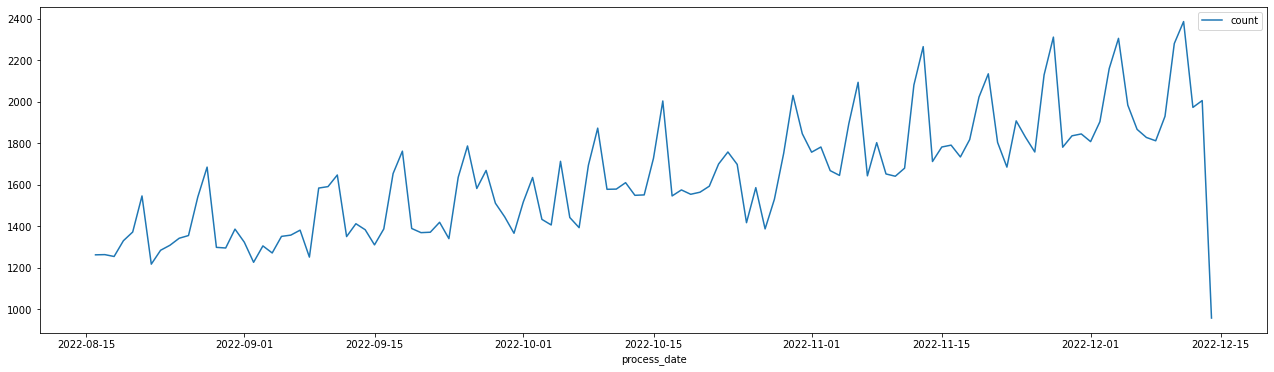

In [33]:
day_wise_order_counts.plot(x='process_date', y='count', figsize=(22,6));

In [36]:
# Note: We see a upwards trend in the graph, which is expected (due to more users added to the platform and stickiness)
# Note: Also, we see that there is a seasonality trend in the graph, it seems like the seasonality behaviour can be attibuted to the days of the week

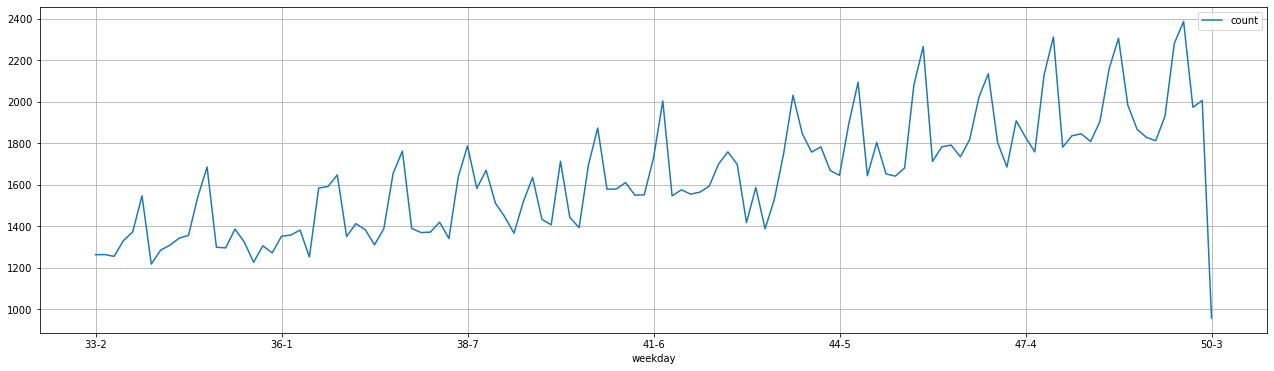

In [35]:
day_wise_order_counts['weekday'] = day_wise_order_counts['process_date'].apply(lambda x: str(x.isocalendar().week) + "-" + str(x.isocalendar().weekday))
day_wise_order_counts.sort_values(by='process_date', inplace=True)
day_wise_order_counts.plot(x='weekday', y='count', figsize=(22,6), grid=True);
# 1-> Monday 7-> Sunday

# From the below graph we see that the number of orders are maximum on Sunday 

In [ ]:
# To see the WoW(week on week) increase in the orders, we perform the following

In [68]:
n_days = 7

mean_orders_ending_on_date = {}
for i in range(int((max(day_wise_order_counts.process_date) - min(day_wise_order_counts.process_date)).days/n_days)):
    lower_limit = min(day_wise_order_counts.process_date) + timedelta(days=i*n_days)
    upper_limit = min(day_wise_order_counts.process_date) + timedelta(days=i*n_days) + timedelta(n_days)
    
    mean_order_count = day_wise_order_counts[(day_wise_order_counts.process_date >= lower_limit) & (day_wise_order_counts.process_date <= upper_limit)]['count'].mean()
    mean_orders_ending_on_date[str(lower_limit)] = round(mean_order_count, 2)

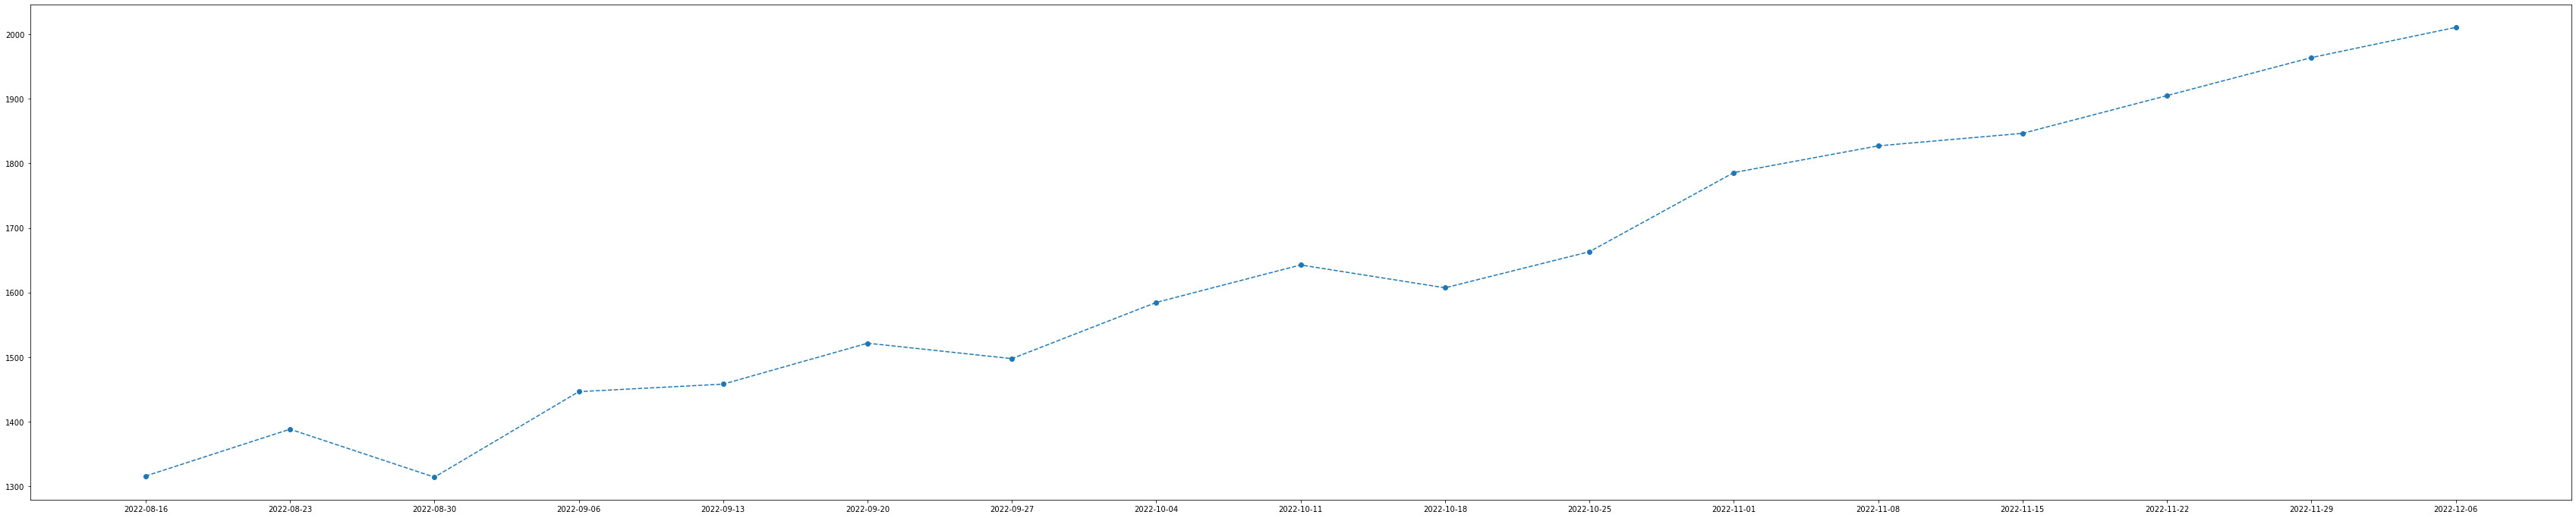

In [69]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(60)
f.set_figheight(12)
plt.plot(mean_orders_ending_on_date.keys(), mean_orders_ending_on_date.values(), 'o--');

plt.show();
# Here we see that average number of order in n_days are increasing linearly